# Transformação da variável independente

_Luis Caldas de Oliveira_

Neste notebook apresenta-se a forma de implementar a transformação da variável independente usando o SympPy (sinais em tempo contínuo) e o NumPy (sinais em tempo discreto)

## Sinais em tempo contínuo

Para operar com sinais em tempo contínuo começamos por importar biblioteca SymPy e definir a impressão dos resultados do código na forma de equações matemáticas. Definimos também a variável $t \in \mathbb{R}$

In [2]:
import sympy as sym
sym.init_printing()

t = sym.symbols('t', real=True)

Definimos uma função para apresentar os gráficos

In [3]:
def PlotSignal(var: sym.core.symbol.Symbol, signal: sym.Piecewise, name: str) -> None:
    splt = sym.plot(signal, (t, -3, 5), xlabel='',
              ylim=[-0.1, 0.6], ylabel='', line_color="red",
              show=False)
    #splt.save(name + '.svg')
    print(name)
    splt.show()
    return

### Sinal de exemplo

Seguidamente vamos criar um sinal de exemplo. Vamos escolher um sinal de duração limitada que definimos por troços.
$$
x(t) =
\begin{cases}
0 & \text{para}\: t < 0 \\
t & \text{para}\: t \ge 0 \land t < 1/2 \\
(2 - t)/3 & \text{para}\: t \ge 1/2 \land t < 2 \\
0 & \text{para}\: t \ge 2
\end{cases}
$$

x(t)


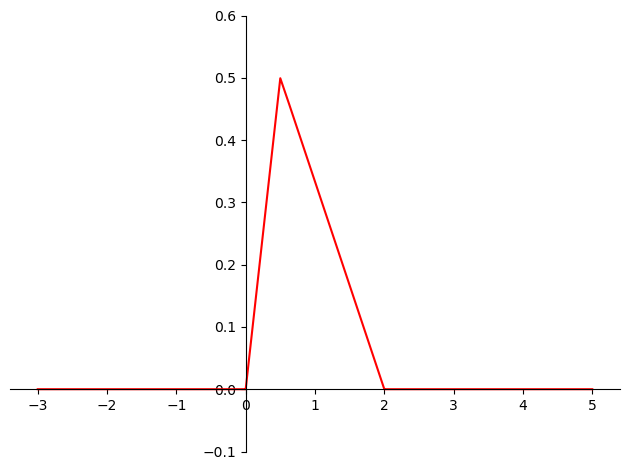

In [4]:
x = sym.Piecewise((0, t<0),
                 (t, (t>=0) & (t<1/2)),
                 ((2-t)/3, (t>=1/2) & (t<2)),
                 (0, t>=2))

PlotSignal(t, x, 'x(t)')

### Deslocamento temporal

O deslocamento temporal de um sinal em tempo contínuo $x(t)$ define-se como:
$$ y(t) = x(t-t_0), \;\; t_0 \in \mathbb{R}$$

Se $t_0 > 0$ o gráfico do sinal desloca-se para a direita.

O método `.subs()` da biblioteca SymPy faz a tranformação da variável independente.

y(t)=x(t-t0)


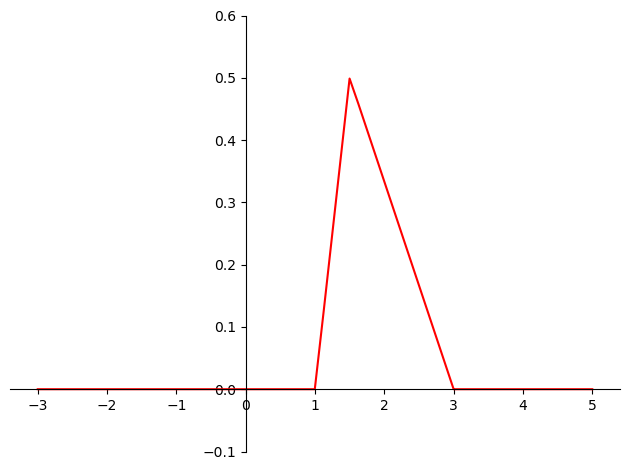

In [5]:
t0 = 1
y = x.subs(t, t-t0)

PlotSignal(t, y, 'y(t)=x(t-t0)')

### Escalamento temporal

O escalmento temporal de um sinal em tempo contínuo $x(t)$ define-se como:
$$ y(t) = x(at), \;\; a \in \mathbb{R}$$

Se $a \in ]0, 1[$ o gráfico do sinal alarga-se.

y(t)=x(a*t)


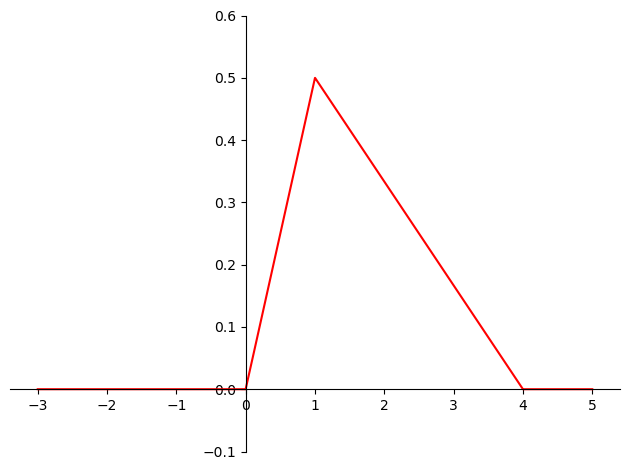

In [6]:
a= 1/2
y = x.subs(t, a*t)

PlotSignal(t, y, 'y(t)=x(a*t)')

### Inversão temporal

A inversão temporal é um caso particular do escalamento temporal quando o fator de escalamento é negativo, por exemplo:
$$ y(t) = x(-t)$$


y(t)=x(-t)


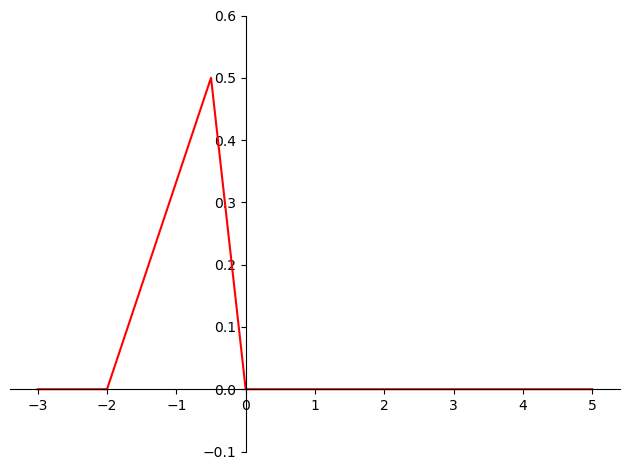

In [7]:
a= -1
y = x.subs(t, a*t)

PlotSignal(t, y, 'y(t)=x(-t)')

### Composição de transformações

No caso geral de uma transformação linear da variável independente:
$$ y(t) = x(at-t_0)$$

A resolução manual é mais facilmente realizada por partes.
Começa-se pelo deslocamento:
$$ x_1(t) = x(t-t_0)$$
seguindo-se a inversão temporal se $a<0$ e o escalamento:
$$ y(t) = x_1(at) = x(at - t_0)$$

No entanto, com o SymPy a transformação pode ser feita de uma vez. Por exemplo:
$$ y(t) = x(-2t+3)$$


x1(t)=x(t+3)


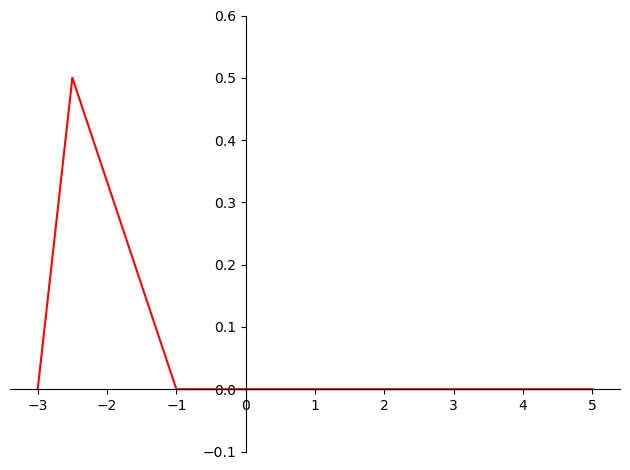

x2(t)=x1(-t)=x(-t+3)


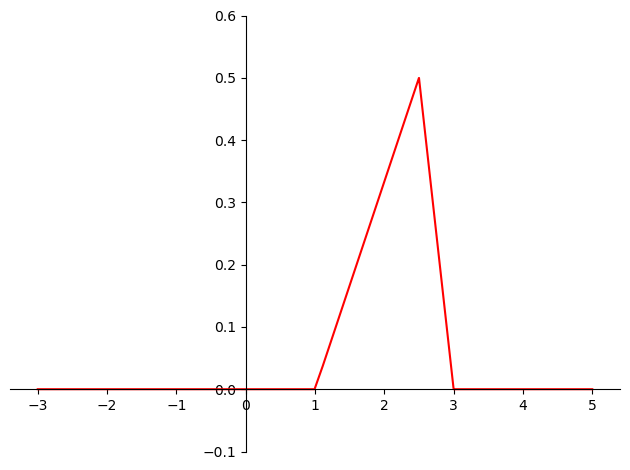

y(t)=x2(2t)=x(-2*t+3)


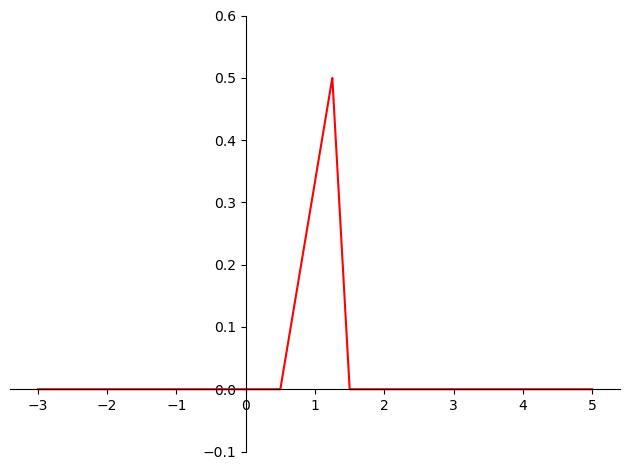

y(t)=x(-2*t+3)


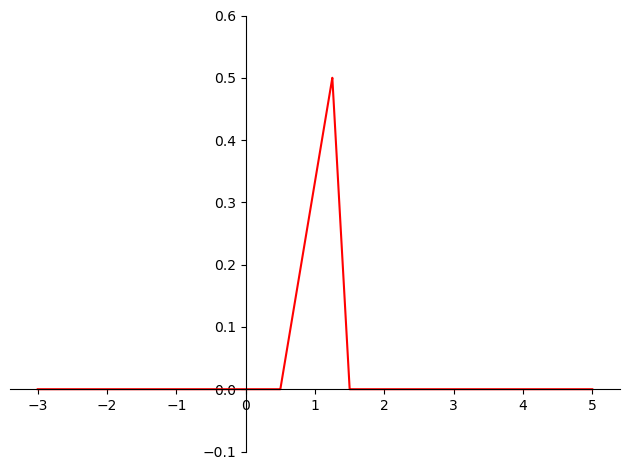

In [26]:
a= -2
t0 = -3

# x1(t) = x(t − t0)
x1 = x.subs(t, t-t0)
PlotSignal(t, x1, 'x1(t)=x(t%+d)'%(-t0))

if (a<0):
    # x2(t) = x1(-t) = x(-t − t0)
    x2 = x1.subs(t, -t)
    PlotSignal(t, x2, 'x2(t)=x1(-t)=x(-t%+d)'%(-t0))
    y = x2.subs(t, abs(a)*t)
    PlotSignal(t, y, 'y(t)=x2(%dt)=x(%d*t%+d)'%(-a, a, -t0))
else:
    y = x1.subs(t, a*t)
    PlotSignal(t, y, 'y(t)=x1(%dt)=x(%d*t%+d)'%(a, a, -t0))

# just to check
y = x.subs(t, a*t-t0)
PlotSignal(t, y, 'y(t)=x(%d*t%+d)'%(a, -t0))

## Sinais em tempo discreto

Para operar com sinais em tempo contínuo começamos por importar biblioteca NumPy e a biblioteca gráfica matplotlib.


In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Função para desenhar os gráficos.

In [14]:
def PlotDSignal(var: np.array, signal: np.array, name: str) -> None:
    plt.figure(figsize=(7, 3))
    plt.stem(var, signal, markerfmt='o',basefmt='black')
    plt.xticks(np.arange(min(n), max(n)+1, 1.0))
    plt.gca().margins(y=0.15)
    plt.grid()
    plt.xlabel('$n$')
    plt.ylabel('$'+name+'$')
    plt.show()
    return

### Sinal de exemplo

Tal como em tempo contínuo, vamos criar um sinal de duração limitada que definimos por troços:
$$
x(n) =
\begin{cases}
0 & \text{para}\: n < 0 \\
2 & \text{para}\: n \ge 0 \land n < 3 \\
4 & \text{para}\: n \ge 3 \land n < 6 \\
0 & \text{para}\: n \ge 6
\end{cases}
$$

em que $n \in \mathbb{Z}$.

O sinal é definido como uma função

In [15]:
def xd(n: np.array) -> np.array:
    xd = np.piecewise(n,
                      [n<0, (n>=0)&(n<3), (n>=3)&(n<6), n>=6], 
                      [0, 2, 4, 0])
    return xd

Vamos avaliar o sinal num intervalo limitado de valores no intervalo:
$$
n \in \{n_s, \ldots, n_s + N\}
$$

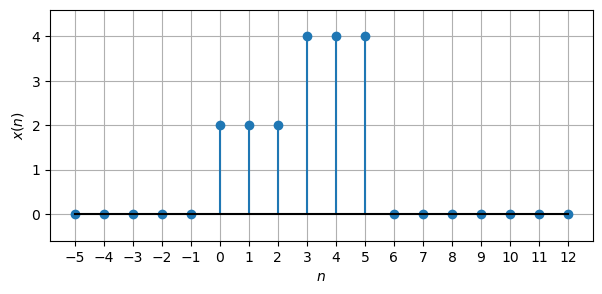

In [16]:
n = np.arange(-5, 13)
PlotDSignal(n, xd(n), 'x(n)')

### Deslocamento temporal

O deslocamento temporal de um sinal em tempo discreto $x(n)$ define-se como:
$$ y(n) = x(n-n_0), \;\; n_0 \in \mathbb{Z}$$

Se $n_0 > 0$ o gráfico do sinal desloca-se para a direita.


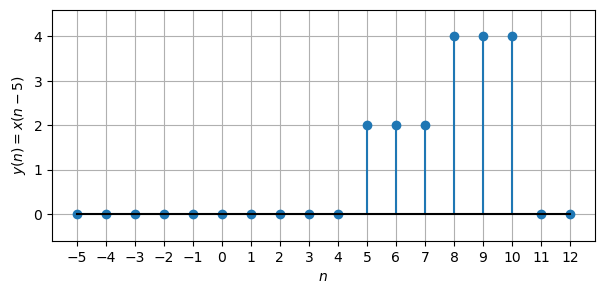

In [17]:
n0 = 5
PlotDSignal(n, xd(n-n0), 'y(n)=x(n%+g)'%(-n0))

### Escalamento temporal

O escalamento temporal de um sinal em tempo discreto $x(n)$ define-se como:
$$ y(n) = x(\lfloor a n \rfloor), \;\; a \in \mathbb{R}$$


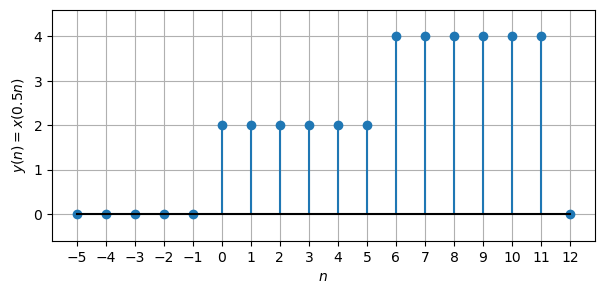

In [18]:
a=1/2
PlotDSignal(n, xd(a*n), 'y(n)=x(%gn)'%a)

### Composição de transformações

No caso geral de uma transformação linear da variável independente:
$$ y(n) = x(\lfloor a n \rfloor -n_0)$$

A resolução manual é mais facilmente realizada por partes.
Começa-se pelo deslocamento:
$$ x_1(n) = x(n - n_0)$$
seguindo-se a inversão se $a<0$ e o escalamento:
$$ y(n) = x_1(\lfloor a n \rfloor) = x(\lfloor a n \rfloor -n_0)$$

No entanto, com o SymPy a transformação pode ser feita de uma vez. Por exemplo:
$$ y(n) = x(-2n+3)$$

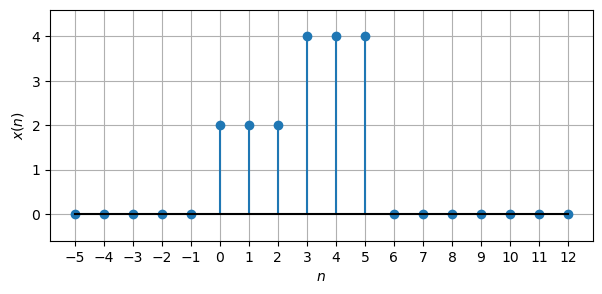

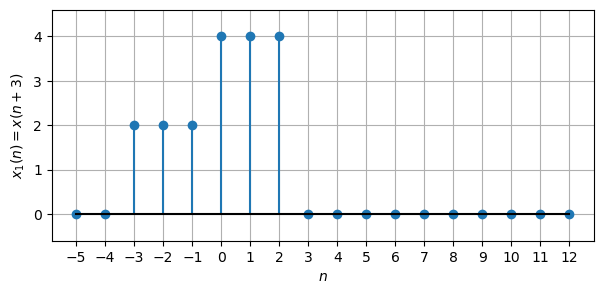

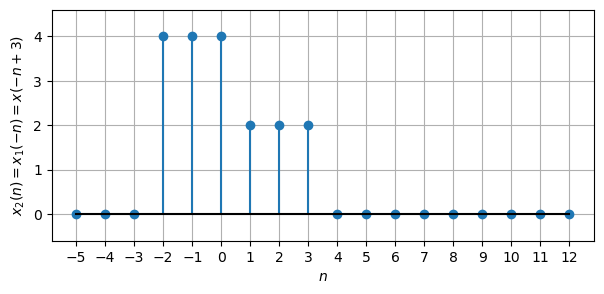

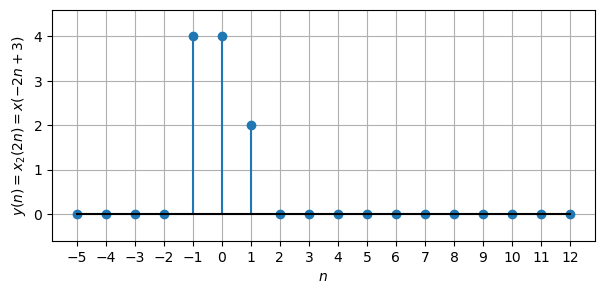

In [22]:
a = -2
n0 = -3

PlotDSignal(n, xd(n), 'x(n)')

PlotDSignal(n, xd(n-n0), 'x_1(n)=x(n%+g)'%(-n0))

if (a<0):
    PlotDSignal(n, xd(-n-n0), 'x_2(n)=x_1(-n)=x(-n%+g)'%(-n0))
    PlotDSignal(n, xd(a*n-n0), 'y(n)=x_2(%g n)=x(%gn%+g)'%(-a, a, -n0))
else:
    PlotDSignal(n, xd(a*n-n0), 'y(n)=x_1(%g n)=x(%gn%+g)'%(a, a, -n0))
